In [1]:
from pylab import *

In [2]:
x,y,f = np.loadtxt("array_54x54.xyz",usecols=(1,2,4),skiprows=2,unpack=True)

In [3]:
f

array([  0.,   0.,   1., ..., 727., 728., 728.])

In [4]:
r = 1.1
Dic = {}
natoms = int( len(x) )
for n in range(natoms):
    a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r
    vecinos = [i for i, x in enumerate(a) if x and i!=n]
    Dic[n] = vecinos

In [5]:
H = np.zeros((natoms,natoms))

In [6]:
γ = 1
λ = 4.5
for n in Dic.keys():
    vecinos = Dic[n]
    for v in vecinos:
        f0 = f[n]
        f1 = f[v]
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        H[n,v] = fase
        H[v,n] = fase

f0 = 0
f1 = 0
fase = 1
for n in Dic.keys():
    vecinos = Dic[n]
    for v in vecinos:
        posx     = x[n]
        posy     = y[n]
        f0       = f[n]
        f1       = f[v] 
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        
        if ( posx%2==0 and posy%2==0  ):
            if ( x[v] > x[n] ):
                H[(n,v)] = -fase
                H[(v,n)] = -fase
        elif(posx%2==1 and posy%2==1):
            if ( x[v] > x[n] ):
                H[(n,v)] = -fase
                H[(v,n)] = -fase
        else:
            pass

In [7]:
print(H)

[[ 0.  -1.   0.  ...  0.   0.   0. ]
 [-1.   0.   4.5 ...  0.   0.   0. ]
 [ 0.   4.5  0.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.  -4.5  0. ]
 [ 0.   0.   0.  ... -4.5  0.   1. ]
 [ 0.   0.   0.  ...  0.   1.   0. ]]


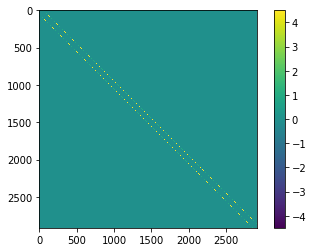

In [8]:
imshow(H)
colorbar()

In [9]:
Ek, U = eig(H)

(array([208., 288., 414., 238., 184.,  72.,  16.,  24.,  12.,   0.,   0.,
          0.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,  12.,
         24.,  16.,  72., 184., 238., 414., 288., 208.]),
 array([-7.77045105e+00, -7.25242098e+00, -6.73439091e+00, -6.21636084e+00,
        -5.69833077e+00, -5.18030070e+00, -4.66227063e+00, -4.14424056e+00,
        -3.62621049e+00, -3.10818042e+00, -2.59015035e+00, -2.07212028e+00,
        -1.55409021e+00, -1.03606014e+00, -5.18030070e-01, -7.10542736e-15,
         5.18030070e-01,  1.03606014e+00,  1.55409021e+00,  2.07212028e+00,
         2.59015035e+00,  3.10818042e+00,  3.62621049e+00,  4.14424056e+00,
         4.66227063e+00,  5.18030070e+00,  5.69833077e+00,  6.21636084e+00,
         6.73439091e+00,  7.25242098e+00,  7.77045105e+00]),
 <a list of 30 Patch objects>)

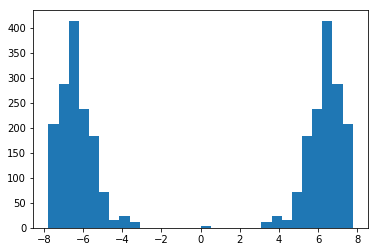

In [10]:
hist(Ek,30)

In [11]:
nsel = 2
# vdot(U.T[0],U.T[0])
Estado = U.T[nsel]
Esel   = Ek[nsel]
print ( Esel)

-1.7812374564421744e-15


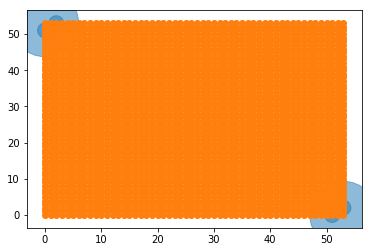

In [12]:
scatter(x,y,s=Estado*Estado*10000,alpha=0.5)
scatter(x,y)

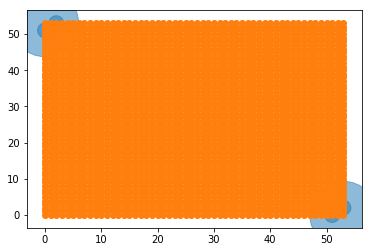

In [13]:
scatter(x,y,s=Estado*Estado*10000,alpha=0.5)
scatter(x,y)

In [14]:
indexsort = argsort(Ek)
print (Ek[indexsort])

[-7.77045105 -7.77045105 -7.75890224 ...  7.75890224  7.77045105
  7.77045105]


In [15]:
from ipywidgets import *


In [16]:
@interact(n=(0,natoms-1))
def enpsi(n=0):
    nsel = indexsort[n]
    # vdot(U.T[0],U.T[0])\
    Estado = U.T[nsel]
    Esel   = Ek[nsel]
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.0,6.0))
    axes.set_title("{0:.3f}".format(Esel))
    axes.scatter(x,y,color="red",s=1,zorder=2)
    axes.scatter(x,y,s=Estado*Estado*10000,alpha=0.5)
    
    fig.tight_layout()
    
    

interactive(children=(IntSlider(value=0, description='n', max=2915), Output()), _dom_classes=('widget-interact',))

In [17]:
indexsort

array([101,  94, 105, ..., 120,  97, 111])

In [18]:
n = 54
X = []
Y = []
for i in range(n):
    for j in range(n):
        X.append(i)
        Y.append(j)
        

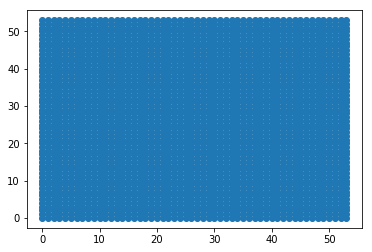

In [19]:
scatter(X,Y)

In [20]:
r = 54
a = zeros((r,r))
n = 0
m = 0
for j in range(r):
    for i in range(r):
        a[i,j] = n
        print((i,j,n))
        if i%2 == 1:
            n += 1   
        if (j%2 == 1 and i == r-1):
            m += r/2 
        if r-1 == i:
            n = m
                

(0, 0, 0)
(1, 0, 0)
(2, 0, 1)
(3, 0, 1)
(4, 0, 2)
(5, 0, 2)
(6, 0, 3)
(7, 0, 3)
(8, 0, 4)
(9, 0, 4)
(10, 0, 5)
(11, 0, 5)
(12, 0, 6)
(13, 0, 6)
(14, 0, 7)
(15, 0, 7)
(16, 0, 8)
(17, 0, 8)
(18, 0, 9)
(19, 0, 9)
(20, 0, 10)
(21, 0, 10)
(22, 0, 11)
(23, 0, 11)
(24, 0, 12)
(25, 0, 12)
(26, 0, 13)
(27, 0, 13)
(28, 0, 14)
(29, 0, 14)
(30, 0, 15)
(31, 0, 15)
(32, 0, 16)
(33, 0, 16)
(34, 0, 17)
(35, 0, 17)
(36, 0, 18)
(37, 0, 18)
(38, 0, 19)
(39, 0, 19)
(40, 0, 20)
(41, 0, 20)
(42, 0, 21)
(43, 0, 21)
(44, 0, 22)
(45, 0, 22)
(46, 0, 23)
(47, 0, 23)
(48, 0, 24)
(49, 0, 24)
(50, 0, 25)
(51, 0, 25)
(52, 0, 26)
(53, 0, 26)
(0, 1, 0)
(1, 1, 0)
(2, 1, 1)
(3, 1, 1)
(4, 1, 2)
(5, 1, 2)
(6, 1, 3)
(7, 1, 3)
(8, 1, 4)
(9, 1, 4)
(10, 1, 5)
(11, 1, 5)
(12, 1, 6)
(13, 1, 6)
(14, 1, 7)
(15, 1, 7)
(16, 1, 8)
(17, 1, 8)
(18, 1, 9)
(19, 1, 9)
(20, 1, 10)
(21, 1, 10)
(22, 1, 11)
(23, 1, 11)
(24, 1, 12)
(25, 1, 12)
(26, 1, 13)
(27, 1, 13)
(28, 1, 14)
(29, 1, 14)
(30, 1, 15)
(31, 1, 15)
(32, 1, 16)
(33, 1, 16)
(34,

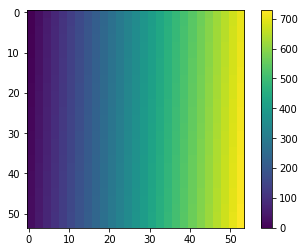

In [21]:
imshow(a)
colorbar()

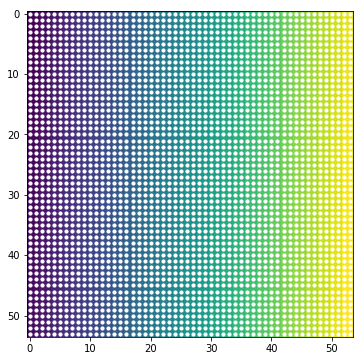

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.0,6.0))
axes.scatter(X,Y,color="white",s=10,zorder=2)
axes.imshow(a)

In [23]:
q = r/2
for i in range(r):
    for j in range(r):
        s = a[i,j]
        x = (s - s%q )/q
        y = s%q
        print(x,y)
        if (x%3 == 1 and y%3 == 1):
            a[i,j] = 0
        if  x in [3,4,5,12,13,14,21,22,23] and  y in [3,4,5,12,13,14,21,22,23]:
            a[i,j] = 0
        if x in [9,10,11,12,13,14,15,16,17] and y in [9,10,11,12,13,14,15,16,17]:
            a[i,j] = 0

0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
2.0 0.0
2.0 0.0
3.0 0.0
3.0 0.0
4.0 0.0
4.0 0.0
5.0 0.0
5.0 0.0
6.0 0.0
6.0 0.0
7.0 0.0
7.0 0.0
8.0 0.0
8.0 0.0
9.0 0.0
9.0 0.0
10.0 0.0
10.0 0.0
11.0 0.0
11.0 0.0
12.0 0.0
12.0 0.0
13.0 0.0
13.0 0.0
14.0 0.0
14.0 0.0
15.0 0.0
15.0 0.0
16.0 0.0
16.0 0.0
17.0 0.0
17.0 0.0
18.0 0.0
18.0 0.0
19.0 0.0
19.0 0.0
20.0 0.0
20.0 0.0
21.0 0.0
21.0 0.0
22.0 0.0
22.0 0.0
23.0 0.0
23.0 0.0
24.0 0.0
24.0 0.0
25.0 0.0
25.0 0.0
26.0 0.0
26.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
2.0 0.0
2.0 0.0
3.0 0.0
3.0 0.0
4.0 0.0
4.0 0.0
5.0 0.0
5.0 0.0
6.0 0.0
6.0 0.0
7.0 0.0
7.0 0.0
8.0 0.0
8.0 0.0
9.0 0.0
9.0 0.0
10.0 0.0
10.0 0.0
11.0 0.0
11.0 0.0
12.0 0.0
12.0 0.0
13.0 0.0
13.0 0.0
14.0 0.0
14.0 0.0
15.0 0.0
15.0 0.0
16.0 0.0
16.0 0.0
17.0 0.0
17.0 0.0
18.0 0.0
18.0 0.0
19.0 0.0
19.0 0.0
20.0 0.0
20.0 0.0
21.0 0.0
21.0 0.0
22.0 0.0
22.0 0.0
23.0 0.0
23.0 0.0
24.0 0.0
24.0 0.0
25.0 0.0
25.0 0.0
26.0 0.0
26.0 0.0
0.0 1.0
0.0 1.0
1.0 1.0
1.0 1.0
2.0 1.0
2.0 1.0
3.0 1.0
3.0 1.0
4.0 

16.0 20.0
17.0 20.0
17.0 20.0
18.0 20.0
18.0 20.0
19.0 20.0
19.0 20.0
20.0 20.0
20.0 20.0
21.0 20.0
21.0 20.0
22.0 20.0
22.0 20.0
23.0 20.0
23.0 20.0
24.0 20.0
24.0 20.0
25.0 20.0
25.0 20.0
26.0 20.0
26.0 20.0
0.0 20.0
0.0 20.0
1.0 20.0
1.0 20.0
2.0 20.0
2.0 20.0
3.0 20.0
3.0 20.0
4.0 20.0
4.0 20.0
5.0 20.0
5.0 20.0
6.0 20.0
6.0 20.0
7.0 20.0
7.0 20.0
8.0 20.0
8.0 20.0
9.0 20.0
9.0 20.0
10.0 20.0
10.0 20.0
11.0 20.0
11.0 20.0
12.0 20.0
12.0 20.0
13.0 20.0
13.0 20.0
14.0 20.0
14.0 20.0
15.0 20.0
15.0 20.0
16.0 20.0
16.0 20.0
17.0 20.0
17.0 20.0
18.0 20.0
18.0 20.0
19.0 20.0
19.0 20.0
20.0 20.0
20.0 20.0
21.0 20.0
21.0 20.0
22.0 20.0
22.0 20.0
23.0 20.0
23.0 20.0
24.0 20.0
24.0 20.0
25.0 20.0
25.0 20.0
26.0 20.0
26.0 20.0
0.0 21.0
0.0 21.0
1.0 21.0
1.0 21.0
2.0 21.0
2.0 21.0
3.0 21.0
3.0 21.0
4.0 21.0
4.0 21.0
5.0 21.0
5.0 21.0
6.0 21.0
6.0 21.0
7.0 21.0
7.0 21.0
8.0 21.0
8.0 21.0
9.0 21.0
9.0 21.0
10.0 21.0
10.0 21.0
11.0 21.0
11.0 21.0
12.0 21.0
12.0 21.0
13.0 21.0
13.0 21.0
14.0 21.0


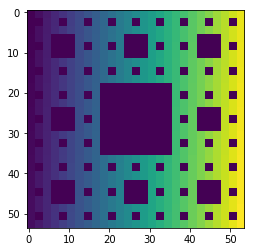

In [24]:
imshow(a)

In [25]:
8 in [1,2,3,4,5,6,7,9]

False

In [26]:
54*54/2

1458.0